In [1]:
# =====================
# !!! TEST RAYLEIGH !!!
# =====================

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import rayleigh, norm
import seaborn as sns
import statistics as st
import matplotlib.patches as mpatches
from astropy import units as u
from astropy.coordinates import SkyCoord

conf = 0.95  # equivalent % to 3 Gaussian sigma

trueRA = 33.057
trueDEC = -51.841

sRA = [0.05063396689515111, 0.022973872903116324, 0.017580391219946707, 0.007678931342927042]
sDEC = [0.032722488250792534,  0.014001725389996828, 0.010664325249884301, 0.004708014031212586]
mRA = [33.05736917671577, 33.05719144617592, 33.05729080923532, 33.057073466188186]
mDEC = [-51.84120998885831, -51.84099263147975, -51.84090713693827, -51.84092558893282] 

sns.set()
extra = mpatches.Patch(color='w', alpha=0)

i = 3
x = np.random.normal(loc=np.absolute(mRA[i]-trueRA), scale=sRA[i], size=10000)
y = np.random.normal(loc=np.absolute(mDEC[i]-trueDEC), scale=sDEC[i], size=10000)
xstd = np.std(x)
xvar = np.var(x)
ystd = np.std(y)
yvar = np.var(y)



fig1 = plt.figure()
ax1 = plt.subplot(111)
sns.distplot(x, bins=20, hist=True, kde=False, fit=norm, color='b', hist_kws={'alpha':0.8})
plt.title('x')
plt.legend([extra, extra], ('mean=%.3f' %np.mean(x), 'std=%.3f' %np.std(x)))

fig2 = plt.figure()
ax2 = plt.subplot(111)
sns.distplot(y, bins=20, hist=True, kde=False, fit=norm, color='b', hist_kws={'alpha':0.8})
plt.title('y')
plt.legend([extra, extra], ('mean=%.3f' %np.mean(y), 'std=%.3f' %np.std(y)))


#z = np.sqrt(x**2 + y**2)
true = (0, 0)
true_coord = SkyCoord(ra = true[0]*u.deg, dec = true[1]*u.deg, frame='fk5')
z = []

for i in range(len(x)) :
    fit_coord = SkyCoord(ra = x[i]*u.deg, dec = y[i]*u.deg, frame='fk5')
    z.append(float(true_coord.separation(fit_coord).deg))                  



zstd = np.std(z)
zvar = np.var(z)
zmean = np.mean(z)

tmp = 0
for i in range(len(z)) :
    tmp += z[i]**2

MLE = np.sqrt(1/(2*len(z)) * tmp)



fig3 = plt.figure()
ax3 = plt.subplot(111)
sns.distplot(z, bins=20, hist=True, kde=False, fit=rayleigh, color='b', hist_kws={'alpha':0.8})
plt.title('z = sqrt(x**2 + y**2)')
ax3.axvline(zmean, c='k', ls='--', label='mean=%.3f' %zmean)
ax3.axvline(MLE, c='r', ls='-.', label='MLE=%.3f' %MLE)
ax3.plot([], [], alpha=0, label='$<\sigma_G>$ = %.3f' %(np.average((np.std(x), np.std(y)))))
ax3.legend()

zmode = np.sqrt(2 / np.pi) * zmean

xystd_mean = np.mean(z)**2*2/np.pi

print('x std, var', xstd, xvar)
print('y std, var', ystd, yvar)
print('z std, var, mean=', zstd, zvar, zmean)
print(MLE**2, xystd_mean, MLE, zmode)



x std, var 0.007640282644873739 5.837391889355885e-05
y std, var 0.0046861089937334744 2.195961750114976e-05
z std, var, mean= 0.004355775900373065 1.8972783694270785e-05 0.007833843356822672
4.017094271675271e-05 3.906878357963455e-05 0.006338055120993561 0.006250502666156903


MLE -------- z_critical
0.006338055120993561 0.01699989177628761


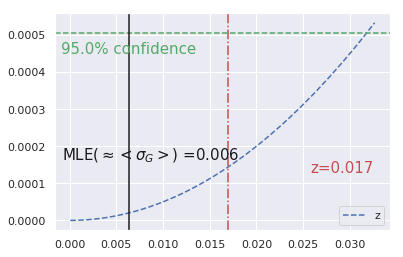

In [2]:
sample = np.random.choice(a=z, size = len(z))
sample_mean = sample.mean()

z_critical = stats.rayleigh.ppf(q = conf, loc=MLE, scale=zstd)  # Get the z-critical value*
x_critical = stats.norm.ppf(q = conf, loc=np.mean(x), scale=np.std(x))
y_critical = stats.norm.ppf(q = conf, loc=np.mean(y), scale=np.std(y))

print("MLE -------- z_critical")              # Check the z-critical value
print(MLE, z_critical)                        

# 1 : max(stat) = conf : yconf ---> yconf = conf * max(stat)
yconf = conf * max(stats.rayleigh.cdf(z))


fig6 = plt.figure()
ax6 = plt.subplot(111)
ax6.plot(np.sort(z), stats.rayleigh.cdf(np.sort(z)), ls='--', label='z')
#ax6.plot(np.sort(y), stats.rayleigh.cdf(np.sort(y)), ls='-.', label='y')
#ax6.plot(np.sort(x), stats.rayleigh.cdf(np.sort(x)), ls=':', label='x')
ax6.axvline(z_critical, c='r', ls='-.')
ax6.axhline(yconf, c='g', ls='--')
ax6.axvline(MLE, c='k', ls='-')

ax6.text(0.42, 0.8, str(conf*100)+'% confidence', 
         verticalalignment='bottom', horizontalalignment='right',
         transform=ax6.transAxes,
         color='g', fontsize=15)

ax6.text(0.95, 0.25, 'z=%.3f' %z_critical, 
         verticalalignment='bottom', horizontalalignment='right',
         transform=ax6.transAxes,
         color='r', fontsize=15)


ax6.text(0.55, 0.30, 'MLE$(\\approx<\\sigma_G>)$ =%.3f' %MLE, 
         verticalalignment='bottom', horizontalalignment='right',
         transform=ax6.transAxes,
         color='k', fontsize=15)


plt.legend(loc=4)

plt.show()

rayleigh conf, magenta (0.00098015232948661, 0.011831171705046242)
scale sigma from gauss, green [-0.017023351597177758, 0.016976431955397463] [-0.016911580929538483, 0.017088202623036737]
scale sigma gauss, red (-0.014998138636549103, 0.014951218994768808) (-0.009096294008597718, 0.009272915702095971)
10000 10000 (1, 10000)


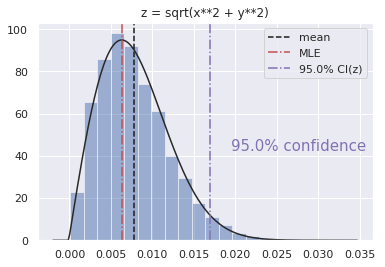

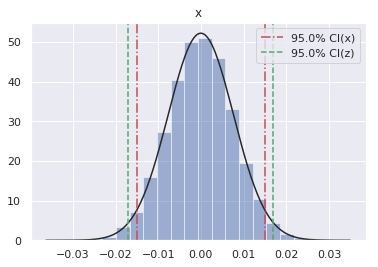

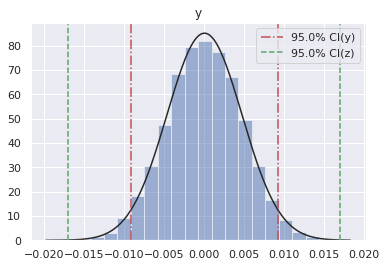

In [3]:
xconf_norm = stats.norm.interval(conf, loc=np.mean(x), scale=np.std(x)) # red
yconf_norm = stats.norm.interval(conf, loc=np.mean(y), scale=np.std(y))

#xconf_test = [np.mean(x) - z_critical/xstd*zstd, np.mean(x) + z_critical/xstd*zstd] # green
#yconf_test = [np.mean(y) - z_critical/ystd*zstd, np.mean(y) + z_critical/ystd*zstd]
#xconf_test = [np.mean(x) - z_critical*np.std(x), np.mean(x) + z_critical*np.std(x)] # green
#yconf_test = [np.mean(y) - z_critical*np.std(y), np.mean(y) + z_critical*np.std(y)]
xconf_test = [np.mean(x) - z_critical, np.mean(x) + z_critical] # green
yconf_test = [np.mean(y) - z_critical, np.mean(y) + z_critical]


conf_int = stats.rayleigh.interval(conf, scale=zstd) # mag
#conf_int = [MLE - z_critical*np.std(z), MLE + z_critical*np.std(z)] 
#conf_int = confidence_interval

print('rayleigh conf, magenta', conf_int)
#print('scale sigma from R, black', conf_testx, conf_testy)
print('scale sigma from gauss, green', xconf_test, yconf_test)
print('scale sigma gauss, red', xconf_norm, yconf_norm)
#print(margin_of_error)

fig7 = plt.figure()
ax7 = plt.subplot(111)
sns.distplot(z, bins=20, hist=True, kde=False, fit=rayleigh, color='b', hist_kws={'alpha':0.5})
plt.title('z = sqrt(x**2 + y**2)')
ax7.axvline(zmean, c='k', ls='--', label='mean')
ax7.axvline(MLE, c='r', ls='-.', label='MLE')
ax7.axvline(z_critical, c='m', ls='-.', label=str(conf*100)+'% CI(z)')
    
ax7.text(0.98, 0.4, str(conf*100)+'% confidence', 
         verticalalignment='bottom', horizontalalignment='right',
         transform=ax7.transAxes,
         color='m', fontsize=15)
    
plt.legend()    
fig7.figure



fig8 = plt.figure()
ax8 = plt.subplot(111)
sns.distplot(x, bins=20, hist=True, kde=False, fit=norm, color='b', hist_kws={'alpha':0.5})
plt.title('x')

for i in range(len(conf_int)) :
    ax8.axvline(xconf_norm[i], c='r', ls='-.', label=str(conf*100)+'% CI(x)' if i==0 else None)
#    ax8.axvline(conf_testx[i], c='k', ls='-.', label='%.3f$\\sigma_{R}$' %z_critical if i==0 else None)
    ax8.axvline(xconf_test[i], c='g', ls='--', label=str(conf*100)+'% CI(z)' if i==0 else None)

plt.legend()
fig8.figure



fig9 = plt.figure()
ax9 = plt.subplot(111)
sns.distplot(y, bins=20, hist=True, kde=False, fit=norm, color='b', hist_kws={'alpha':0.5})
plt.title('y')

for i in range(len(conf_int)) :
    ax9.axvline(yconf_norm[i], c='r', ls='-.', label=str(conf*100)+'% CI(y)' if i==0 else None)
#    ax9.axvline(conf_testy[i], c='k', ls='-.', label='%.3f$\\sigma_{R}$' %z_critical if i==0 else None)
    ax9.axvline(yconf_test[i], c='g', ls='--', label=str(conf*100)+'% CI(z)' if i==0 else None)

plt.legend()
    
fig9.figure


z_inv = np.array(z).reshape(1,10000)

  
print(len(x), len(y), z_inv.shape)
    
    
    


/home/ambra/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/ambra/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


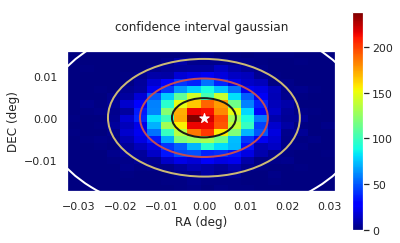

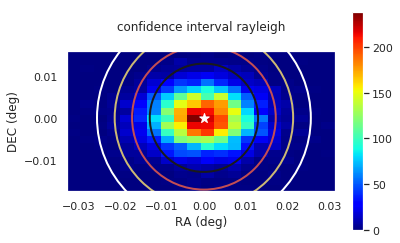

In [4]:
from matplotlib.patches import Ellipse, Circle
from mpl_toolkits.axes_grid1 import make_axes_locatable

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

nstd = [1,2,3,5]
color = ['k', 'r', 'y', 'w']

bins=20
fontsize = 12
    
fig10 = plt.figure()
ax10 = plt.subplot(111)
h, xbin, ybin, img = plt.hist2d(x, y, bins=bins, cmap='jet')
plt.scatter(true[0], true[1], marker='*', color='w', s=1e2)

#divider = make_axes_locatable(ax10)
#cax = divider.append_axes("bottom", size="0%", pad=0.05)
plt.colorbar(img, orientation='vertical', ax=ax10)
plt.title('confidence interval gaussian\n', fontsize=fontsize)
plt.xlabel('RA (deg)', fontsize=fontsize)
plt.ylabel('DEC (deg)', fontsize=fontsize)

for i in range(len(nstd)) :
    cov = np.cov(x, y)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, v = 2 * nstd[i] * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
              width=w, height=v,
              angle=theta, color=color[i], lw=2)
    ell.set_facecolor('none')
    ax10.add_artist(ell)

plt.axes().set_aspect('equal')
fig10.figure

fig10.savefig('run0406_10000x_CIgauss_test.png')


fig11 = plt.figure()
ax11 = plt.subplot(111)
h, xbin, ybin, img = plt.hist2d(x, y, bins=bins, cmap='jet')
plt.scatter(true[0], true[1], marker='*', color='w', s=1e2)
plt.colorbar(img, orientation='vertical', ax=ax11)
plt.title('confidence interval rayleigh\n', fontsize=fontsize)
plt.xlabel('RA (deg)', fontsize=fontsize)
plt.ylabel('DEC (deg)', fontsize=fontsize)

conf_int = [0.6827, 0.9545, 0.9973, 0.99994]
for i in range(len(conf_int)) :
    r = stats.rayleigh.ppf(q=conf_int[i], loc=MLE, scale=zstd)
    ell = Circle(xy=(np.mean(x), np.mean(y)),
              radius=r,
              angle=theta, color=color[i], lw=2)
    ell.set_facecolor('none')
    ax11.add_artist(ell)

plt.axes().set_aspect('equal')
fig11.figure

fig11.savefig('run0406_10000x_CIrayleigh_test.png')


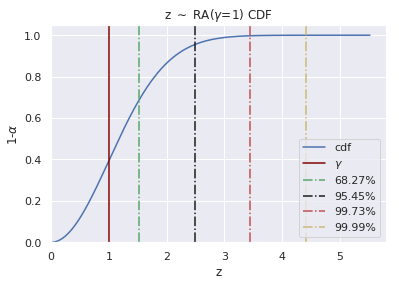

1.5151947600179898
2.485977857111858
3.4393323497364543
4.4093459822842265


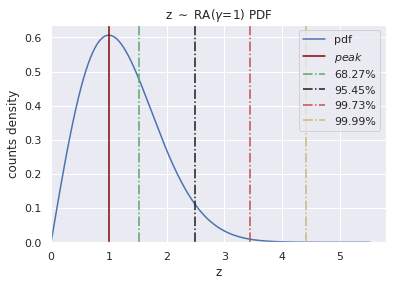

0.4279058283391803 1


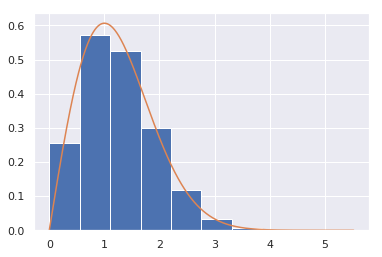

In [7]:
gamma=1
z = np.random.rayleigh(scale=gamma, size=1000000)
MLE = 0.606/gamma

z_critical = []
zcrit = []
colors = ['g', 'k', 'r', 'y']
probs = [0.6827, 0.9545, 0.9973, 0.99994]

for i in range(len(probs)) :
    z_critical.append(stats.rayleigh.ppf(q = probs[i], loc=0, scale=gamma))  # Get the z-critical value*
#    zcrit.append(-np.log(1-probs[i]))   # quantile stuff, not what we look for

fig12 = plt.figure()
ax12 = plt.subplot(111)
ax12.plot(np.sort(z), stats.rayleigh.cdf(np.sort(z), loc=0, scale=gamma), ls='-', label='cdf')
ax12.axvline(gamma, c='maroon', label='$\gamma$')
#ax12.axvline(scale+np.std(z), c='maroon', ls=':', label='1 std at z=%.2f' %(scale+np.std(z)))

for i in range(len(probs)) :
    ax12.axvline(z_critical[i], c=colors[i], ls='-.', 
#                 label='z=%.2f, %.2f' %(z_critical[i],probs[i]*100)+'%')
                 label='%.2f' %(probs[i]*100)+'%')

plt.ylabel('1-$\\alpha$', rotation=90, fontsize=12)
plt.xlabel('z', fontsize=12)
plt.title('z $\\sim$ RA($\\gamma$=%d) CDF' %gamma, fontsize=12)
ax12.set_xlim(left=0)
ax12.set_ylim(bottom=0)
plt.legend(loc=0)

plt.show()
fig12.savefig('theo_rayleigh_cdf.png')


fig13 = plt.figure()
ax13 = plt.subplot(111)
ax13.plot(np.sort(z), stats.rayleigh.pdf(np.sort(z), loc=0, scale=gamma), ls='-', label='pdf')
ax13.axvline(gamma, c='maroon', label='$peak$')
#ax13.axvline(np.std(z), c='maroon', ls=':', label='1 std at z=%.2f' %(np.std(z)))

for i in range(len(probs)) :
    ax13.axvline(z_critical[i], c=colors[i], ls='-.', 
#                 label='z=%.2f, %.2f' %(z_critical[i],probs[i]*100)+'%')
                 label='%.2f' %(probs[i]*100)+'%')

#    print(np.abs(gamma-z_critical[i])/np.std(z))
    print(z_critical[i])



plt.ylabel('counts density', rotation=90, fontsize=12)
plt.xlabel('z', fontsize=12)
plt.title('z $\\sim$ RA($\\gamma$=%d) PDF' %gamma, fontsize=12)
ax13.set_xlim(left=0)
ax13.set_ylim(bottom=0)
plt.legend(loc=0)

plt.show()
fig13.savefig('theo_rayleigh_pdf.png')


print(np.var(z), gamma)

fig14 = plt.figure()
ax14 = plt.subplot(111)
ax14.hist(z, density=True)
ax14.plot(np.sort(z), stats.rayleigh.pdf(np.sort(z), loc=0, scale=gamma))


plt.show()

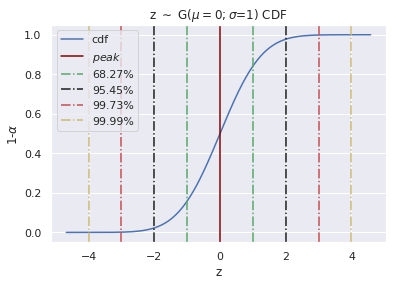

0.9999521811005887
1.9999043622011774
2.999856543301766
3.999808724402355


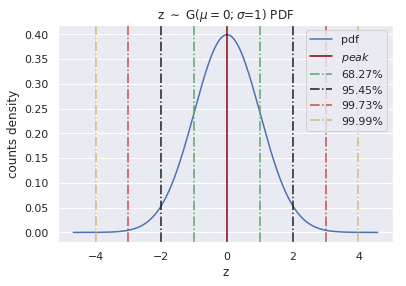

0.9999043644878246 1


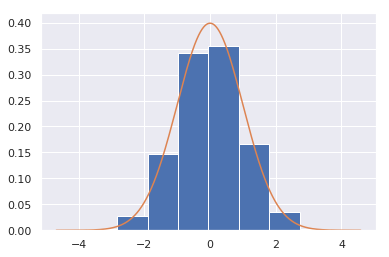

In [8]:
sigma=1
z = np.random.normal(loc=0, scale=sigma, size=1000000)
MLE = 0.606/sigma

z_critical = []
zcrit = []
colors = ['g', 'k', 'r', 'y']
probs = [0.6827, 0.9545, 0.9973, 0.99994]

for i in range(len(probs)) :
    z_critical.append(stats.norm.ppf(q = probs[i], loc=0, scale=sigma))  # Get the z-critical value*
#    zcrit.append(-np.log(1-probs[i]))   # quantile stuff, not what we look for

fig12 = plt.figure()
ax12 = plt.subplot(111)
ax12.plot(np.sort(z), stats.norm.cdf(np.sort(z), loc=0, scale=sigma), ls='-', label='cdf')
ax12.axvline(0, c='maroon', label='$peak$')
#ax12.axvline(scale+np.std(z), c='maroon', ls=':', label='1 std at z=%.2f' %(scale+np.std(z)))

for i in range(len(probs)) :
    ax12.axvline(np.std(z)*(i+1), c=colors[i], ls='-.', 
#                 label='z=%.2f, %.2f' %(z_critical[i],probs[i]*100)+'%')
                 label='%.2f' %(probs[i]*100)+'%')
    ax12.axvline(-np.std(z)*(i+1), c=colors[i], ls='-.')


plt.ylabel('1-$\\alpha$', rotation=90, fontsize=12)
plt.xlabel('z', fontsize=12)
plt.title('z $\sim$ G($\\mu=0;\\sigma$=%d) CDF' %sigma, fontsize=12)
#ax12.set_xlim(left=0)
#ax12.set_ylim(bottom=0)
plt.legend(loc=0)

plt.show()
fig12.savefig('theo_gauss_cdf.png')


fig13 = plt.figure()
ax13 = plt.subplot(111)
ax13.plot(np.sort(z), stats.norm.pdf(np.sort(z), loc=0, scale=sigma), ls='-', label='pdf')
ax13.axvline(0, c='maroon', label='$peak$')
#ax13.axvline(np.std(z), c='maroon', ls=':', label='1 std at z=%.2f' %(np.std(z)))

for i in range(len(probs)) :
    ax13.axvline(np.std(z)*(i+1), c=colors[i], ls='-.', 
#                 label='z=%.2f, %.2f' %(z_critical[i],probs[i]*100)+'%')
                 label='%.2f' %(probs[i]*100)+'%')
    ax13.axvline(-np.std(z)*(i+1), c=colors[i], ls='-.')

#    print(np.abs(sigma-z_critical[i])/np.std(z))
    print(np.std(z)*(i+1))


plt.ylabel('counts density', rotation=90, fontsize=12)
plt.xlabel('z', fontsize=12)
plt.title('z $\sim$ G($\\mu=0;\\sigma$=%d) PDF' %sigma, fontsize=12)
#ax13.set_xlim(left=0)
#ax13.set_ylim(bottom=0)
plt.legend(loc=0)

plt.show()
fig13.savefig('theo_gauss_pdf.png')


print(np.var(z), sigma)

fig14 = plt.figure()
ax14 = plt.subplot(111)
ax14.hist(z, density=True)
ax14.plot(np.sort(z), stats.norm.pdf(np.sort(z), loc=0, scale=gamma))


plt.show()